<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/2348506_Lab9/blob/main/2348506_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [54]:
path = '/content/drive/MyDrive/lab9/BrainTumorClassification/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
x = []
y = []

In [55]:
for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    x.append(img)
    y.append(classes[cls])

In [56]:
x = np.array(x)
y = np.array(y)

In [57]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

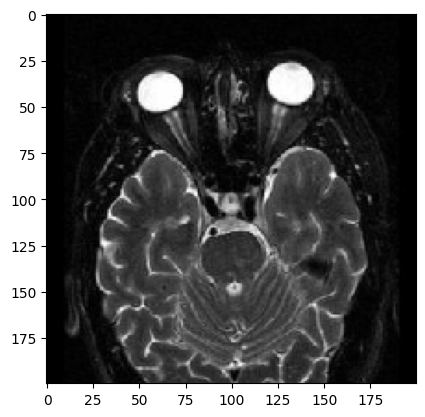

In [58]:
pt.imshow(x[0], cmap='gray');

In [59]:
x = x.reshape(len(x), -1)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,test_size=.20)

In [61]:
sv = svc()

In [62]:
sv2 = sv.fit(x_train, y_train)

In [63]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9918116683725691
Testing Score: 0.9428571428571428


In [64]:
ages = []
for i in range(1222):
  ages.append(np.random.randint(30,90))

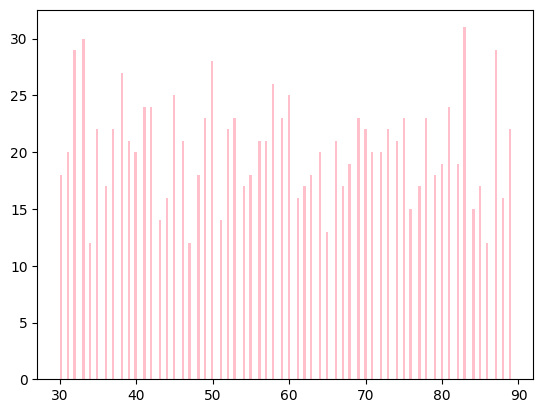

In [65]:
pt.hist(ages, bins=200, color='pink');

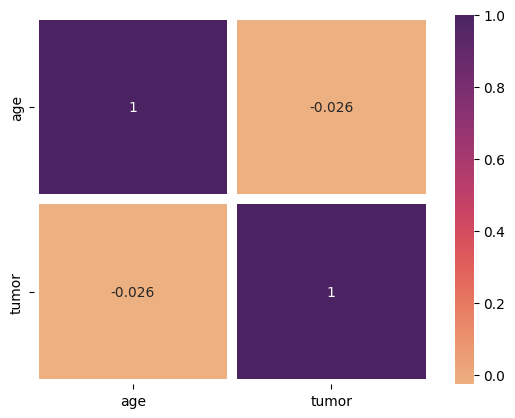

In [66]:
sb.heatmap(np.corrcoef(ages, y), annot=True, cmap='flare', linewidths=6,\
           xticklabels=['age', 'tumor'], yticklabels=['age', 'tumor']);

In [67]:
y_pred = sv.predict(x_test)

In [68]:
print('the precision score is',precision_score(y_test, y_pred))
print('the recall score is',recall_score(y_test, y_pred))
print('the f1-score is',f1_score(y_test, y_pred))

the precision score is 0.936046511627907
the recall score is 0.9817073170731707
the f1-score is 0.9583333333333333


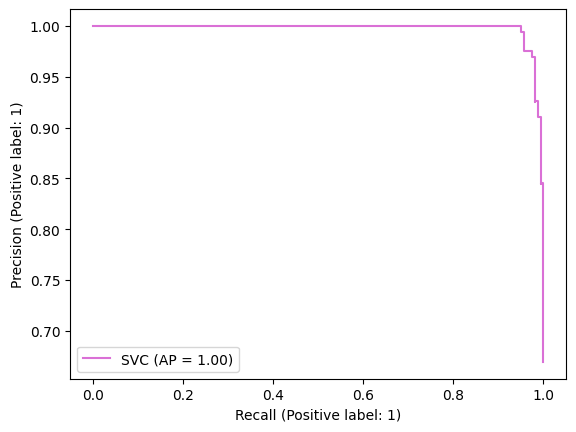

In [69]:
PrecisionRecallDisplay.from_estimator(sv, x_test, y_test, color='orchid');

In [70]:
sv = svc(probability=True)

In [71]:
sv.fit(x_train, y_train)

SVC(probability=True)

In [72]:

y_pred = sv.predict(x_test)

In [73]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

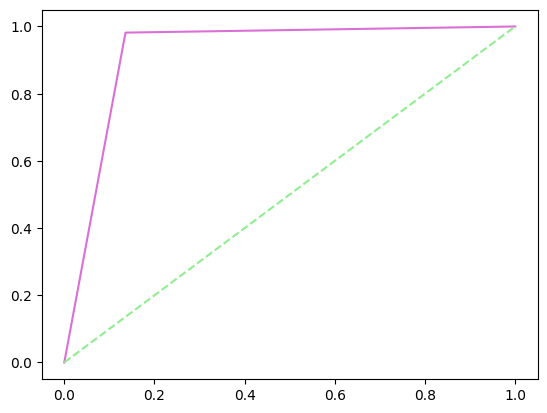

In [74]:
pt.plot(fpr, tpr, color='orchid')
pt.plot([0, 1], ls="--", color='lightgreen');

In [75]:
dec={ 'pituitary_tumor':1,'no_tumor':0}

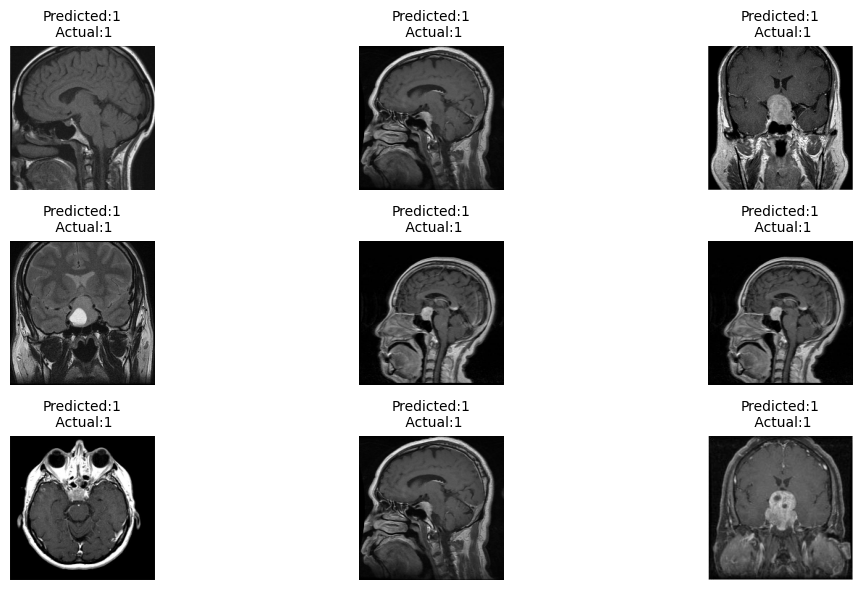

In [79]:
test_path = '/content/drive/MyDrive/lab9/BrainTumorClassification/Testing'
x_test = []
y_test = []
for cls in dec:
  tpth=os.path.join(test_path,cls)
  for j in os.listdir(tpth):
    img=cv2.imread(os.path.join(tpth,j),cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(200,200))
    x_test.append(img)
    y_test.append(dec[cls])
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test_rshpd=x_test.reshape(x_test.shape[0],-1)
y_pred_test=sv2.predict(x_test_rshpd)

pt.figure(figsize=(12,6))
for i in range(9):
  pt.subplot(3,3,i+1)
  pt.imshow(x_test[i], cmap='gray')
  pt.title(f'Predicted:{y_pred_test[i]}\n Actual:{y_test[i]}', fontsize=10)
  pt.axis('off')
pt.tight_layout()
pt.show()